In [1]:
import set_jupyter_env
from apiServer import *

In [2]:
API = ApiServer()
# API.help()

In [3]:
# API.showJsons()

In [4]:
dc = 1
conn_map = 26
exp_flow = 0

In [5]:
API.setJsons(dc , conn_map , exp_flow)
dc_path , conn_map_path , exp_flow_path = API.getUserJsons() # Returns Paths

In [6]:
dc_path

'/usr/local/lib/nerlnet-lib/NErlNet/inputJsonsFiles/DistributedConfig/dc_AEC_1d_2c_1s_4r_4w.json'

In [7]:
# API.add_repo_to_datasets_list('Nerlnet/forest_cover', 'ForestCover', 'Dataset for AEC')

In [8]:
API.list_datasets()

0. Nerlnet/skab: ['skab_full.csv', 'skab_full_bins.csv', 'skab_full_poly.csv', 'skab_full_windowed.csv']
1. Nerlnet/MNist: []
2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
3. Nerlnet/forest_cover: ['cover_normalized_std.csv', 'forest_cover_bins.csv', 'forest_cover_dataset.csv', 'forest_cover_reversed.csv']


In [9]:
API.download_dataset(3)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

[INFO][2024-07-30 23:19:17,109] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/ForestCover


In [10]:
exp_name = "ForestCover_AnomalyDetection"
API.initialization(exp_name , dc_path , conn_map_path , exp_flow_path)

[INFO][2024-07-30 23:19:21,820] 
Network components:
                 Receiver's Address: http://10.0.0.5:8082
                 Frequency: 300 [batches/sec]
                 Batchsize: 100 [samples]
                 devicesIp: ['10.0.0.5']
                 mainServerIp: 10.0.0.5
                 mainServerPort: 8081
                 apiServerIp: 10.0.0.5
                 apiServerPort: 8082
                 Clients: ['c1']
                 Workers: ['w1', 'w2']
                 Sources: ['s1']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-07-30 23:19:21,821] Connections:
[INFO][2024-07-30 23:19:21,823] 		 r1 : ['mainServer', 'r2']
[INFO][2024-07-30 23:19:21,824] 		 r2 : ['r3', 's1']
[INFO][2024-07-30 23:19:21,824] 		 r3 : ['r4', 'c1']
[INFO][2024-07-30 23:19:21,825] 		 r4 : ['r1', 'c2']
[INFO][2024-07-30 23:19:21,826] Experiment name: anomaly_detection_skab
[INFO][2024-07-30 23:19:21,826] Batch size: 100
[INFO][2024-07-30 23:19:21,828] Number of features: 10
[INFO][202

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-07-30 23:19:23,846] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [11]:
API.send_jsons_to_devices()

[INFO][2024-07-30 23:19:24,687] Sending distributed configurations to devices is completed


In [12]:
API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(0) # When using Unsupervised Learning like AE/AEC
API.run_current_experiment_phase()

[INFO][2024-07-30 23:19:25,279] Experiment phase: training_phase of type training starts running...
[INFO][2024-07-30 23:19:25,281] Sending data to sources
[INFO][2024-07-30 23:20:34,218] Data is ready in sources
[INFO][2024-07-30 23:20:34,382] Phase training requested from Main Server
[INFO][2024-07-30 23:20:50,408] Processing experiment phase data
[INFO][2024-07-30 23:20:50,597] Processing experiment phase data completed
[INFO][2024-07-30 23:20:50,599] Start generating communication statistics for training_phase of type training
[INFO][2024-07-30 23:20:50,601] Statistics requested from Main Server
[INFO][2024-07-30 23:20:50,657] Statistics received from Main Server
[INFO][2024-07-30 23:20:50,658] Phase of training_phase training completed


In [13]:
train_stats1 = API.get_experiment_flow(exp_name).generate_stats()
train_stats_aec1 = API.get_experiment_flow(exp_name).generate_stats_aec(train_stats1)

In [14]:
train_stats1.get_communication_stats_main_server()
train_stats1.get_communication_stats_workers()

OrderedDict([('w1',
              {'bytes_received': 0,
               'bytes_sent': 0,
               'bad_messages': 0,
               'batches_received_train': 2495,
               'batches_received_predict': 0,
               'batches_dropped_train': 5,
               'batches_dropped_predict': 0,
               'batches_sent_train': 0,
               'empty_batches': 0,
               'batches_sent_predict': 0,
               'average_time_training': 0,
               'average_time_prediction': 0,
               'acc_time_training': 0,
               'acc_time_prediction': 0,
               'nan_loss_count': 0}),
             ('w2',
              {'bytes_received': 0,
               'bytes_sent': 0,
               'bad_messages': 0,
               'batches_received_train': 0,
               'batches_received_predict': 0,
               'batches_dropped_train': 0,
               'batches_dropped_predict': 0,
               'batches_sent_train': 0,
               'empty_batches': 0,

In [15]:
labels = []
with open('/tmp/nerlnet/data/NerlnetData-master/nerlnet/ForestCover/cover_normalized_std.csv') as f:
    for i in range(310000):
        line = f.readline()
        label = line.split(',')[-1]
        label = label.rstrip()
        labels.append(float(label))
print(f'Contains {len(labels)} labels')
anomaly_count = len([label for label in labels if label == 1.0])
normal_count = len([label for label in labels if label == 0.0])
print(f'Anomaly Count: {anomaly_count}')
print(f'Normal Count: {normal_count}')

Contains 310000 labels
Anomaly Count: 29309
Normal Count: 280691


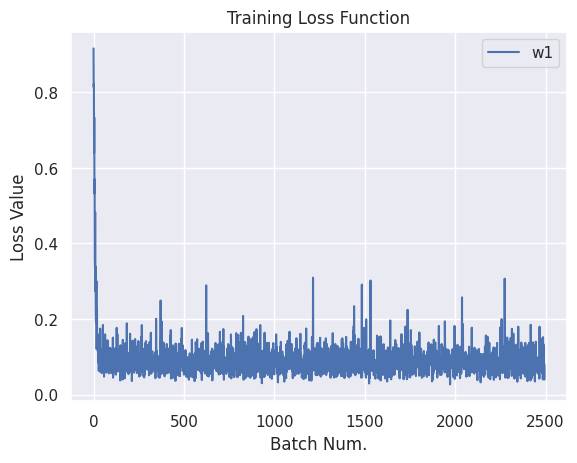

In [16]:
loss_dict = train_stats_aec1.get_aec_loss(plot=True)

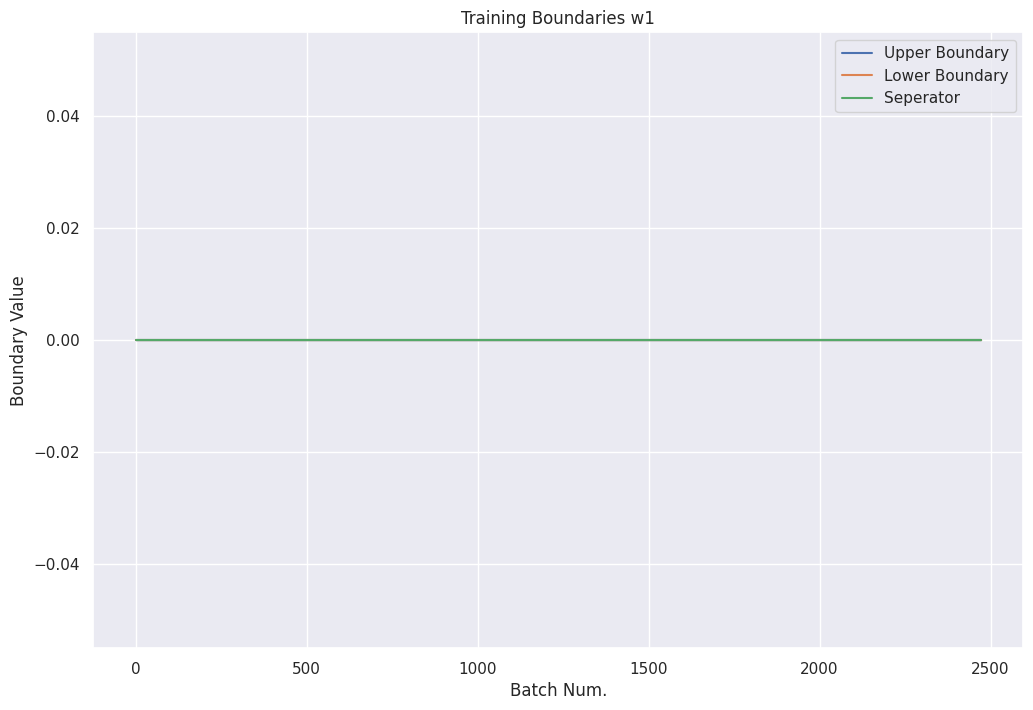

In [17]:
df_upper, df_lower = train_stats_aec1.get_aec_boundaries(plot=True)

In [18]:
loss_values_dict = train_stats_aec1.get_loss_batchid_per_worker()
len(loss_values_dict['w1'])
loss_values_dict['w1'][0]
batch_size = len(loss_values_dict['w1'][0][1])
batch_size

100

In [19]:
w1_loss_batchid_list = []
for batchID, loss_list in loss_values_dict['w1']:
    for i in range(batch_size):
        w1_loss_batchid_list.append((batchID, i + int(batchID)*batch_size, float(loss_list[i])))
w1_loss_batchid_list[0]

/tmp/ipykernel_3070656/1708356485.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w1_loss_batchid_list.append((batchID, i + int(batchID)*batch_size, float(loss_list[i])))


(0, 0, 0.13141556084156036)

In [20]:
loss_labels_pairs_w1 = []
for batchID, sampleID, loss_val in w1_loss_batchid_list:
    loss_labels_pairs_w1.append((loss_val, labels[sampleID]))
loss_labels_pairs_w1[2]

(0.034731946885585785, 0.0)

In [21]:
anomalies_loss_w1 = [loss for loss, label in loss_labels_pairs_w1 if label == 1.0]
normal_loss_w1 = [loss for loss, label in loss_labels_pairs_w1 if label == 0.0]
print(f'# Anomalies Loss Values: {len(anomalies_loss_w1)}, # Normal Loss Values: {len(normal_loss_w1)}')

# Anomalies Loss Values: 4987, # Normal Loss Values: 244513


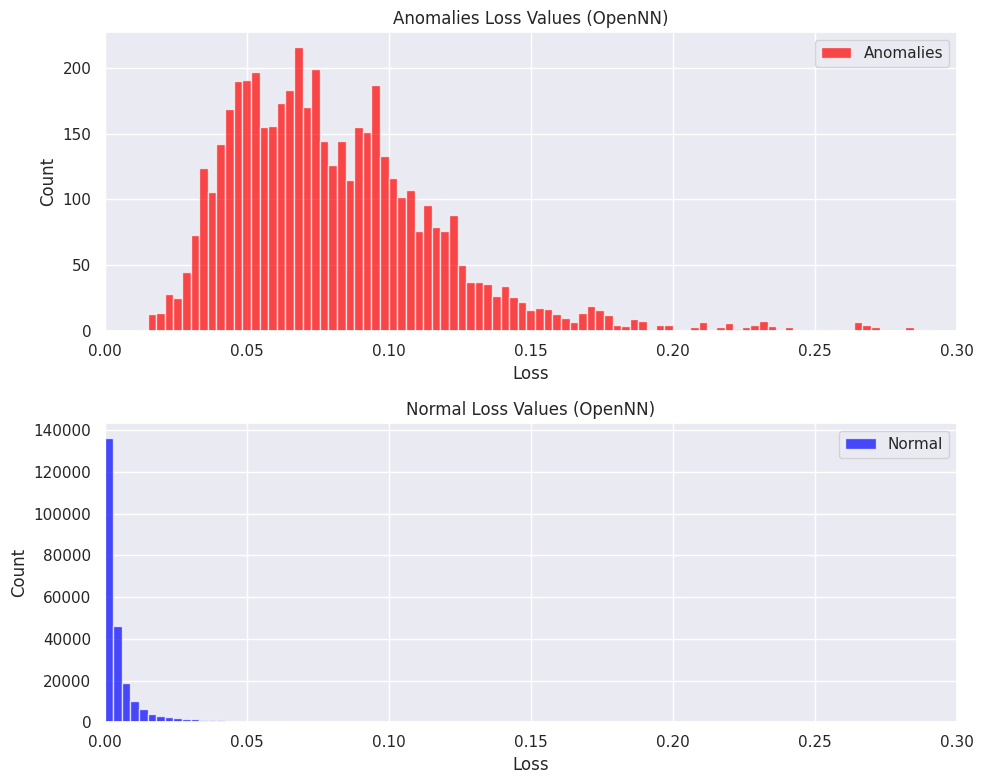

In [22]:
# Plot the loss values
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

bins = np.linspace(0, 0.3, 100)

ax1.hist(anomalies_loss_w1, bins=bins, color='red', alpha=0.7, label='Anomalies')
ax1.set_title('Anomalies Loss Values (OpenNN)')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Count')
ax1.set_xlim([0, 0.3])
ax1.legend()

ax2.hist(normal_loss_w1, bins=bins, color='blue', alpha=0.7, label='Normal')
ax2.set_title('Normal Loss Values (OpenNN)')
ax2.set_xlabel('Loss')
ax2.set_ylabel('Count')
ax2.set_xlim([0, 0.3])
ax2.legend()

plt.tight_layout()
plt.show()


In [23]:
def plot_average_aec_errors(loss_labels_pairs: list[tuple]):
    anomaly_loss_values = []
    normal_loss_values = []
    for loss, label in loss_labels_pairs:
        if label == 1.0:
            anomaly_loss_values.append(loss)
        elif label == 0.0:
            normal_loss_values.append(loss)
        else:
            print("Unknown Label Value (Should be 1.0/0.0")
    avg_anomaly_loss = np.mean(anomaly_loss_values)
    avg_normal_loss = np.mean(normal_loss_values)

    plt.bar('Anomaly', avg_anomaly_loss, label='Anomaly Average Error')
    plt.bar('Normal', avg_normal_loss, label='Normal Average Error')
    
    plt.title("Average Errors Per Worker")
    plt.xticks(positions, workers)
    plt.legend()
    plt.show()

NameError: name 'positions' is not defined

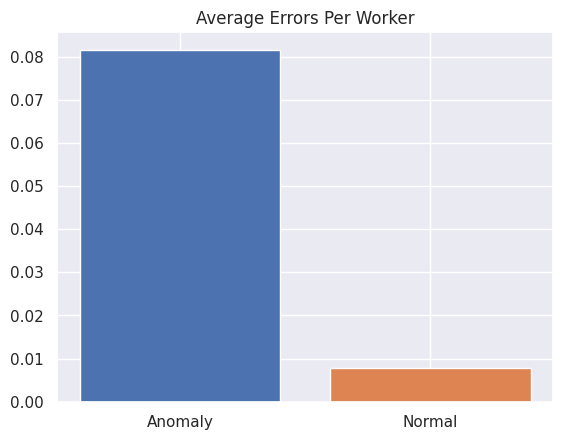

In [24]:
plot_average_aec_errors(loss_labels_pairs_w1)

In [25]:
API.next_experiment_phase()
# API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(1)
API.run_current_experiment_phase()

[INFO][2024-07-30 23:21:13,333] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-07-30 23:21:13,335] Sending data to sources
[INFO][2024-07-30 23:21:19,805] Data is ready in sources
[INFO][2024-07-30 23:21:19,806] Phase prediction requested from Main Server
[INFO][2024-07-30 23:21:24,072] Processing experiment phase data
[INFO][2024-07-30 23:21:24,083] Processing experiment phase data completed
[INFO][2024-07-30 23:21:24,083] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-07-30 23:21:24,084] Statistics requested from Main Server
[INFO][2024-07-30 23:21:24,440] Statistics received from Main Server
[INFO][2024-07-30 23:21:24,441] Phase of prediction_phase prediction completed


In [26]:
API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(1)
predict_stats = API.get_experiment_flow(exp_name).generate_stats()

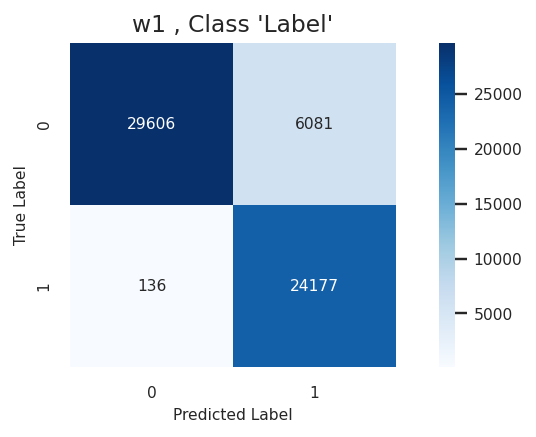

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,Label,29606,6081,136,24177,0.896383,0.912004,0.799028,0.994406,0.829602,0.824008,0.886075


Average False Alarm Rate: 17.0398%
Average Detection Rate: 99.4406%
Average Missing Alarm Rate: 0.5594%
Exp Done


In [27]:
_ , conf_mats = predict_stats.get_confusion_matrices(plot=True)
predict_stats.get_model_performence_stats(conf_mats, show=True)
pred_aec_stats = API.get_experiment_flow(exp_name).generate_stats_aec(predict_stats)
false_alarm_rate = pred_aec_stats.get_false_alarm_rate(conf_mats) # Dict of workers as keys and their rate as value
detection_rate = pred_aec_stats.get_detection_rate(conf_mats)
import numpy as np
print(f'Average False Alarm Rate: {np.mean(list(false_alarm_rate.values()))*100:.4f}%')
print(f'Average Detection Rate: {np.mean(list(detection_rate.values()))*100:.4f}%')
print(f'Average Missing Alarm Rate: {100 - np.mean(list(detection_rate.values()))*100:.4f}%')
print("Exp Done")

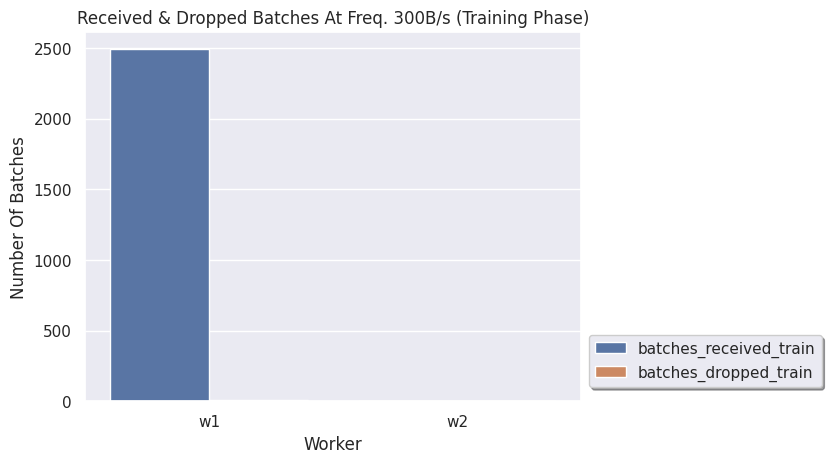

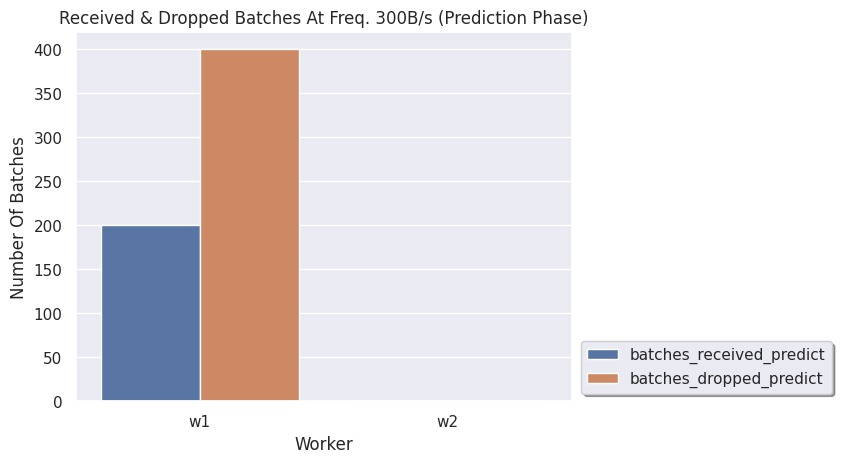

In [28]:
import pandas as pd
workers_comm_dict = train_stats1.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

workers_comm_dict_pred = predict_stats.get_communication_stats_workers()
df_pred = pd.DataFrame.from_dict(workers_comm_dict_pred)

plt.figure()
df_selected_pred = df_pred.iloc[[4,6]]
data_pred = pd.melt(df_selected_pred.reset_index(), id_vars=['index'], value_vars=df_pred.columns)
batches_stats_pred = sns.barplot(x='variable', y='value', hue='index', data=data_pred)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Prediction Phase)")
batches_stats_pred.legend(loc='lower right', bbox_to_anchor=(1.54, 0), shadow=True, ncol=1)
plt.show()

In [35]:
df = pd.read_csv('/tmp/nerlnet/predict_error.csv', header=None)
batch_ids = df.iloc[:, 0]
batches_loss = df.iloc[:, 4:-1]
df = pd.concat([batch_ids, batches_loss], axis=1)
df.columns = ['BatchID'] + list(range(df.shape[1] - 1))
df

,BatchID,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.271604,0.092196,0.109548,0.164127,0.054964,0.054541,0.169089,0.215998,0.368195,...,0.141118,0.208396,0.101707,0.092632,0.052618,0.122832,0.134562,0.093630,0.284563,0.060096
1,3,0.418232,0.052910,0.088871,0.067901,0.056541,0.323082,0.174817,0.273195,0.545932,...,0.144775,0.061415,0.206358,0.104437,0.165375,0.013662,0.119041,0.028213,0.023498,0.529981
2,6,0.308546,0.016237,0.080598,0.259984,0.122103,0.099840,0.143915,0.204602,0.566390,...,0.198085,0.159590,0.221497,0.136584,0.163235,0.154064,0.051674,0.320866,0.129708,0.020028
3,8,0.228410,0.044594,0.090500,0.366910,0.141728,0.164754,0.090847,0.200776,0.608787,...,0.076541,0.089514,0.069420,0.157601,0.168165,0.127627,0.179462,0.436473,0.079267,0.032475
4,11,0.129769,0.050759,0.074426,0.311728,0.167059,0.135444,0.069845,0.143934,0.411235,...,0.123734,0.235314,0.137088,0.103541,0.063328,0.064140,0.275342,0.172295,0.096370,0.049623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,490,0.180985,0.082688,0.102381,0.350396,0.072971,0.286301,0.064065,0.206620,0.694152,...,0.092737,0.047841,0.098971,0.103811,0.255926,0.106776,0.129335,0.360985,0.300467,0.238015
166,492,0.431728,0.062465,0.233317,0.372154,0.148644,0.357349,0.093035,0.302863,0.417968,...,0.141859,0.073626,0.270616,0.088528,0.195925,0.043409,0.028309,0.177232,0.257428,0.218504
167,494,0.178317,0.064370,0.105678,0.331193,0.117022,0.269193,0.348709,0.150799,0.206163,...,0.208545,0.290147,0.075278,0.193602,0.146421,0.130075,0.138019,0.123706,0.086106,0.054332
168,497,0.146059,0.156568,0.112502,0.204220,0.164563,0.104908,0.170220,0.172218,0.556195,...,0.143142,0.164211,0.223784,0.150323,0.082789,0.190664,0.125117,0.144823,0.435042,0.187445


In [89]:
w1_loss_batchid_list_predict = []
for index, row in df.iterrows():
    batchID = row['BatchID']
    for i in range(len(row) - 1):
        sampleID = batchID * batch_size + i
        w1_loss_batchid_list_predict.append((int(sampleID), float(row[i])))
w1_loss_batchid_list_predict[5]

(5, 0.0545407459139823)

In [93]:
loss_labels_pairs_w1_predict = []
for sampleID, loss_val in w1_loss_batchid_list_predict:
    loss_labels_pairs_w1_predict.append((loss_val, labels[sampleID]))
loss_labels_pairs_w1_predict[5]

(0.0545407459139823, 0.0)

In [94]:
anomalies_loss_w1_predict = [loss for loss, label in loss_labels_pairs_w1_predict if label == 1.0]
normal_loss_w1_predict = [loss for loss, label in loss_labels_pairs_w1_predict if label == 0.0]
print(f'# Anomalies Loss Values: {len(anomalies_loss_w1_predict)}, # Normal Loss Values: {len(normal_loss_w1_predict)}')

# Anomalies Loss Values: 323, # Normal Loss Values: 16677


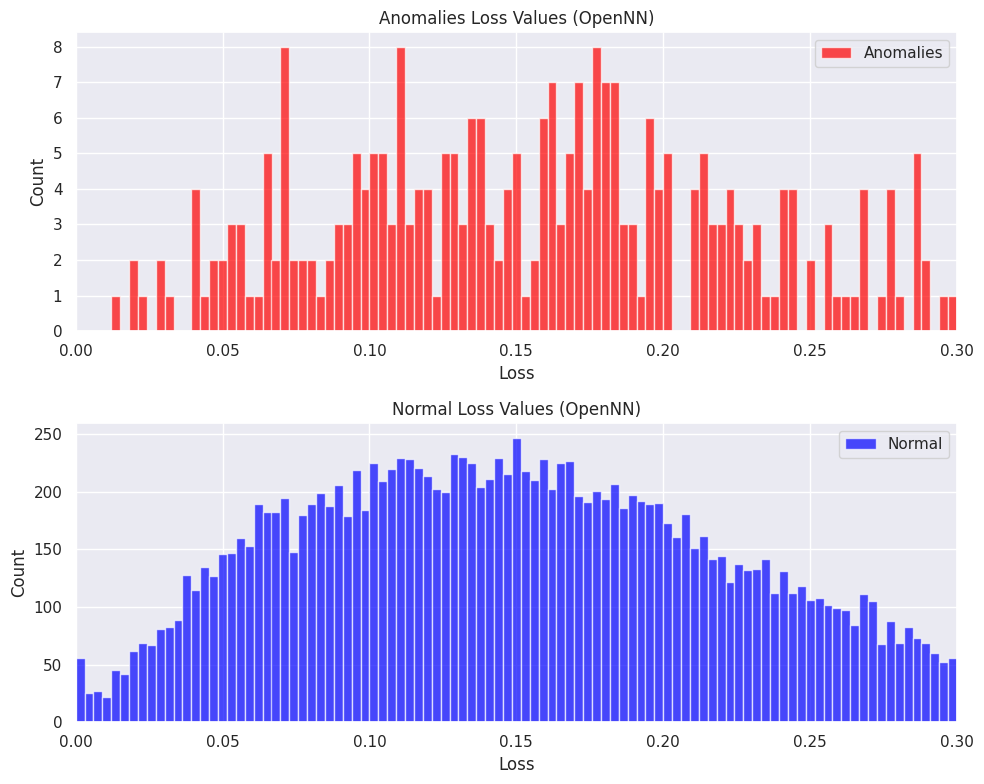

In [96]:
# Plot the loss values
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

bins = np.linspace(0, 0.3, 100)

ax1.hist(anomalies_loss_w1_predict, bins=bins, color='red', alpha=0.7, label='Anomalies')
ax1.set_title('Anomalies Loss Values (OpenNN)')
ax1.set_xlabel('Loss')
ax1.set_ylabel('Count')
ax1.set_xlim([0, 0.3])
ax1.legend()

ax2.hist(normal_loss_w1_predict, bins=bins, color='blue', alpha=0.7, label='Normal')
ax2.set_title('Normal Loss Values (OpenNN)')
ax2.set_xlabel('Loss')
ax2.set_ylabel('Count')
ax2.set_xlim([0, 0.3])
ax2.legend()

plt.tight_layout()
plt.show()


In [95]:
predict_stats.get_communication_stats_workers()

OrderedDict([('w1',
              {'bytes_received': 0,
               'bytes_sent': 0,
               'bad_messages': 0,
               'batches_received_train': 500,
               'batches_received_predict': 170,
               'batches_dropped_train': 0,
               'batches_dropped_predict': 330,
               'batches_sent_train': 0,
               'empty_batches': 0,
               'batches_sent_predict': 0,
               'average_time_training': 0,
               'average_time_prediction': 0,
               'acc_time_training': 0,
               'acc_time_prediction': 0,
               'nan_loss_count': 0}),
             ('w2',
              {'bytes_received': 0,
               'bytes_sent': 0,
               'bad_messages': 0,
               'batches_received_train': 0,
               'batches_received_predict': 0,
               'batches_dropped_train': 0,
               'batches_dropped_predict': 0,
               'batches_sent_train': 0,
               'empty_batches':